In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook')

# 1. Khám phá dữ liệu

In [2]:
df = pd.read_csv('Data/bank-additional-full.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 1. Dữ liệu có bao nhiêu dòng vào cột

In [3]:
print(f'Dữ liệu có {df.shape[0]} dòng')
print(f'Dữ liệu có {df.shape[1]} cột')

Dữ liệu có 41188 dòng
Dữ liệu có 21 cột


## 2. Dữ liệu có trùng lặp không ?

In [4]:
num_dup = df.shape[0] - df.drop_duplicates().shape[0]
print(f'Dữ liệu bị trùng {num_dup} dòng')

Dữ liệu bị trùng 12 dòng


In [5]:
df = df.drop_duplicates()

## 3. Kiểu dữ liệu có gì bất thường không ?

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**<font size ='3'> Kiểu dữ liệu không có gì bất thường.</font>**

## 4. Dữ liệu có bị thiếu không ?

In [7]:
(df == 'unknown').sum(axis = 0)

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

**<font size ='3'> Xóa những dòng bị thiếu ở trên</font>**

In [8]:
df = df[(df != 'unknown').all(axis = 1)].reset_index().drop(columns = 'index')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 5. Khám phá dữ liệu numeric

In [9]:
num_df = df.select_dtypes(['float64', 'int64'])
num_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,39.029694,259.513124,2.521721,956.318295,0.194337,-0.071425,93.523376,-40.602579,3.459976,5160.813967
std,10.332746,261.746393,2.720495,201.404843,0.522862,1.610306,0.585366,4.788790,1.777215,75.158267
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


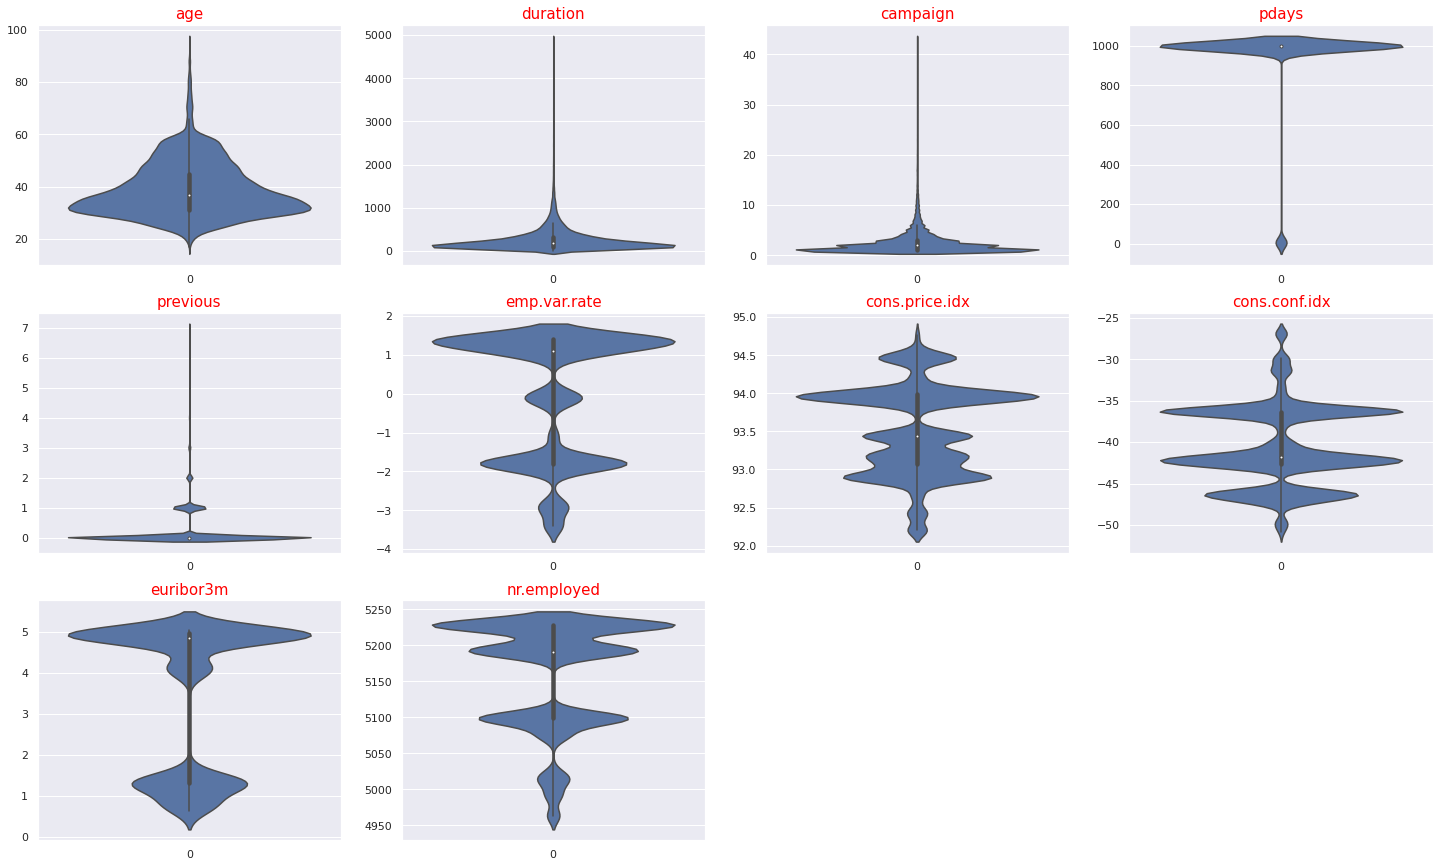

In [10]:
fig, axs = plt.subplots(3,4,figsize = (25,15))
for idx in range(num_df.shape[1]):
    r, c = idx // 4, idx % 4
    sns.violinplot( data = num_df.iloc[:,idx], ax = axs[r,c])
    
    axs[r,c].set_title(f'{num_df.columns[idx]}', fontsize = 15, color = 'red')
    axs[r,c].xaxis.label.set_visible(False)
    axs[r,c].yaxis.label.set_visible(False)
    
axs[2,2].set_visible(False)
axs[2,3].set_visible(False)

- <font size = '4'> Ngoại trừ cột `age` thì các cột còn lại đều lệch hoặc nhiều đỉnh </font>
- <font size = '4'>Ta sẽ chuẩn hóa lại dữ liệu ở phần sau </font>

## 6. Khám phá dữ liệu category

In [11]:
cate_df =df.select_dtypes('object')
cate_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
2,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
3,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
4,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,no


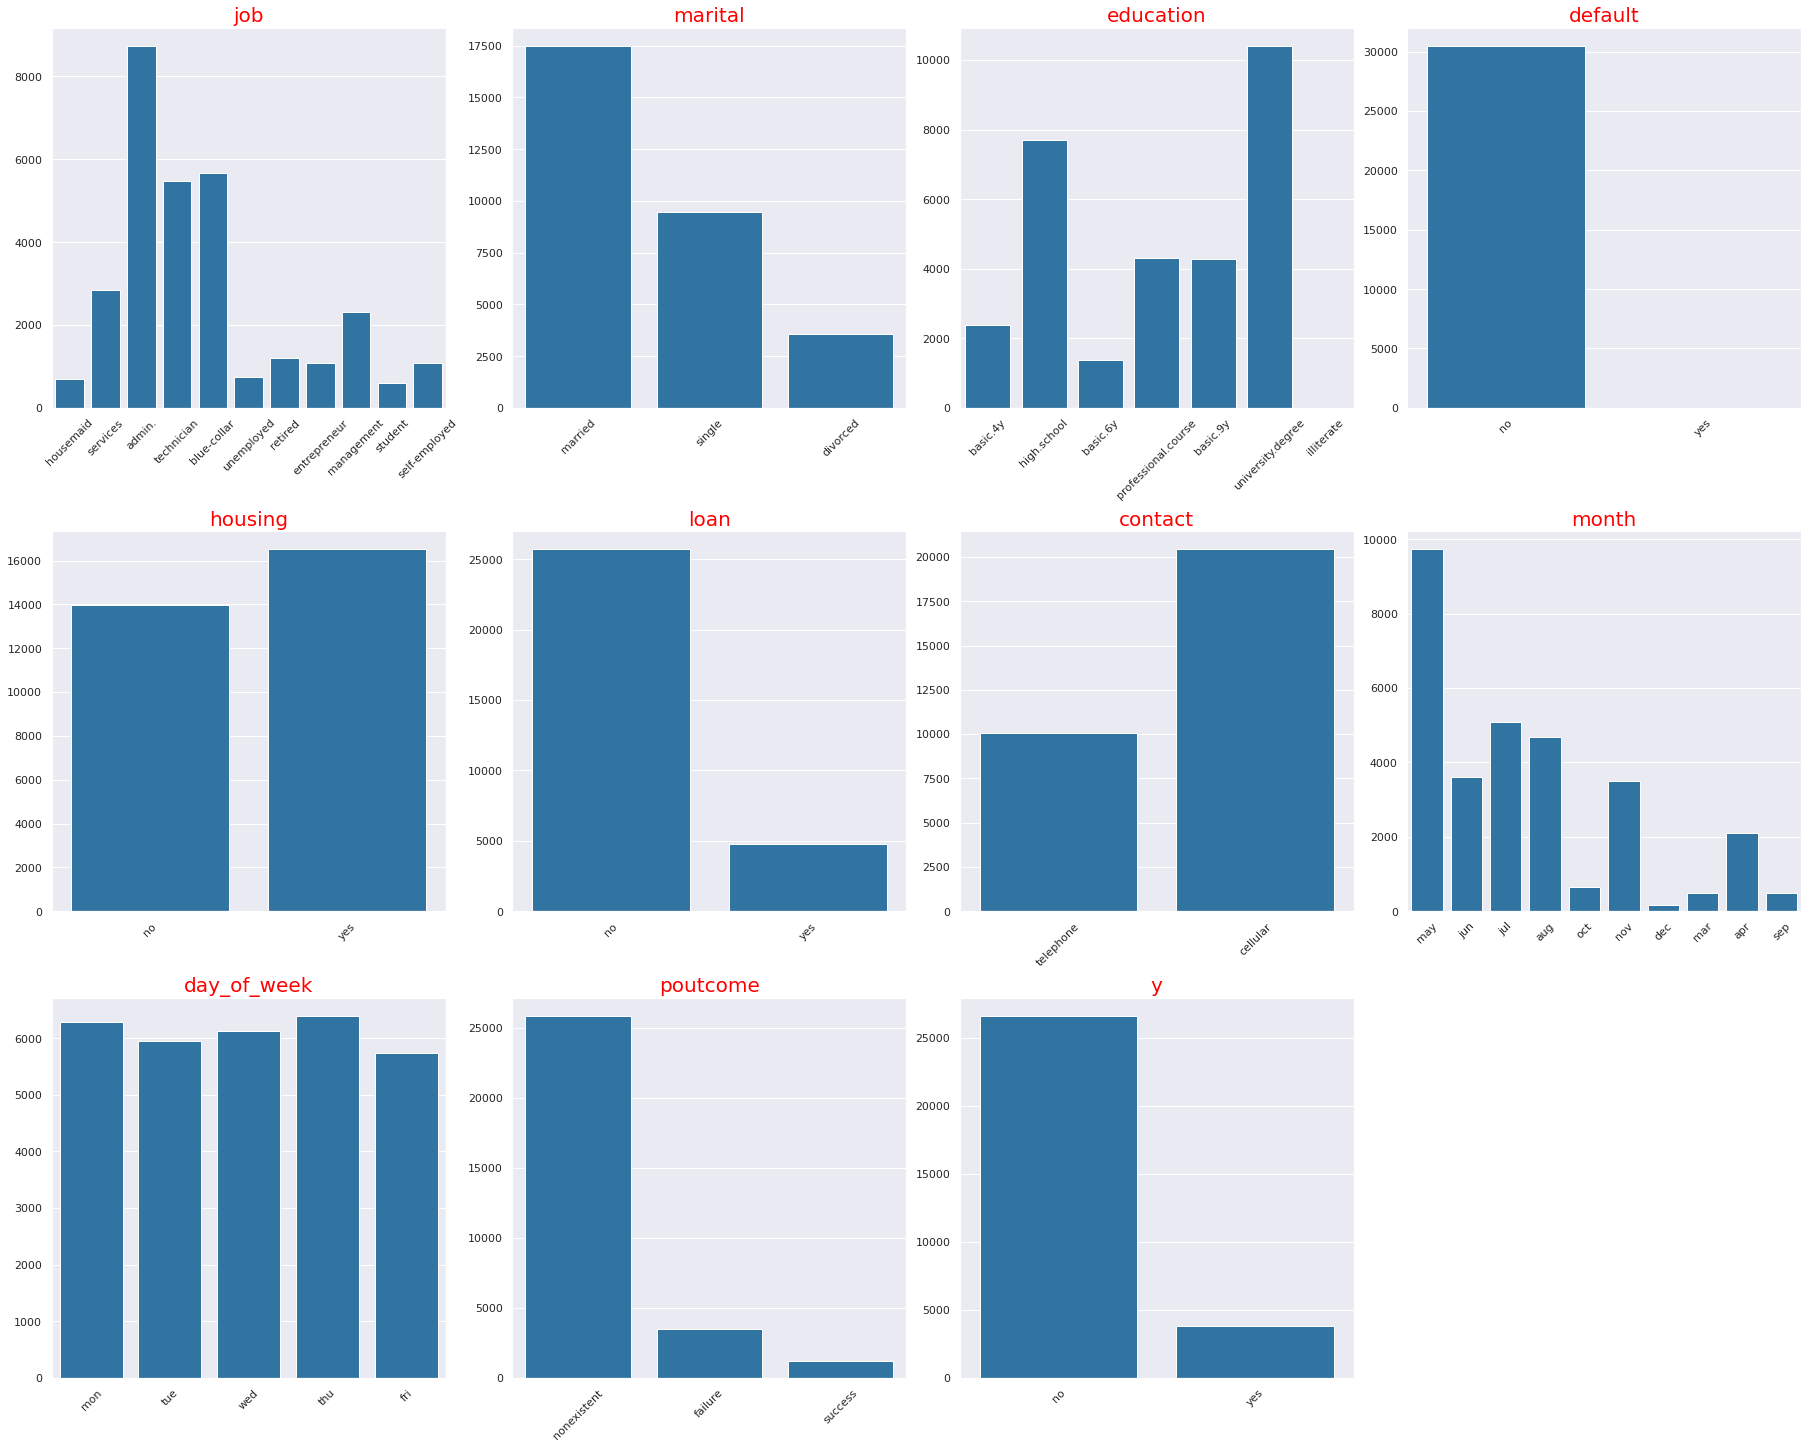

In [12]:
fig, axs = plt.subplots(3,4,constrained_layout = True, figsize = (25,20))
for idx in range(cate_df.shape[1]):
    r, c = idx // 4, idx % 4
    sns.countplot(x = cate_df.iloc[:,idx], ax = axs[r,c], color = 'tab:blue')

    axs[r,c].set_title(f'{cate_df.columns[idx]}', fontsize = 20, color = 'red')
    axs[r,c].tick_params('x', rotation = 45)
    axs[r,c].xaxis.label.set_visible(False)
    axs[r,c].yaxis.label.set_visible(False)

axs[2,3].set_visible(False)

- <font size = '4'>Có thể thấy, cột y là giá trị phải dự đoán bị `imbalanced` </font>

# 2. EDA

In [13]:
def count_val(col):
    df[df]

## 1. Thống kê số lượng các khoản nợ và tỷ lệ đăng ký theo nghề nghiệp

In [14]:
job_df = pd.DataFrame(columns = ['job','default','housing', 'loan', 'y'])
group_job_df = df.groupby('job')
columns = ['default','housing', 'loan', 'y']

for name, subset_df in group_job_df:
    row = pd.DataFrame(job_df.columns)
    row['job'] = name
    for column in columns:
        count = subset_df[subset_df[column] == 'yes']
        row[column] = count.shape[0]
    job_df = pd.concat((job_df,row))
    
job_df = job_df.iloc[:,:-1].drop_duplicates().reset_index().drop(columns = 'index')
job_df

,job,default,housing,loan,y
0,admin.,0,4777,1484,1215
1,blue-collar,0,3017,893,452
2,entrepreneur,0,602,159,101
3,housemaid,0,364,97,87
4,management,0,1221,355,286
5,retired,0,662,166,357
6,self-employed,0,592,154,132
7,services,0,1501,433,258
8,student,0,328,102,203
9,technician,2,3033,811,641


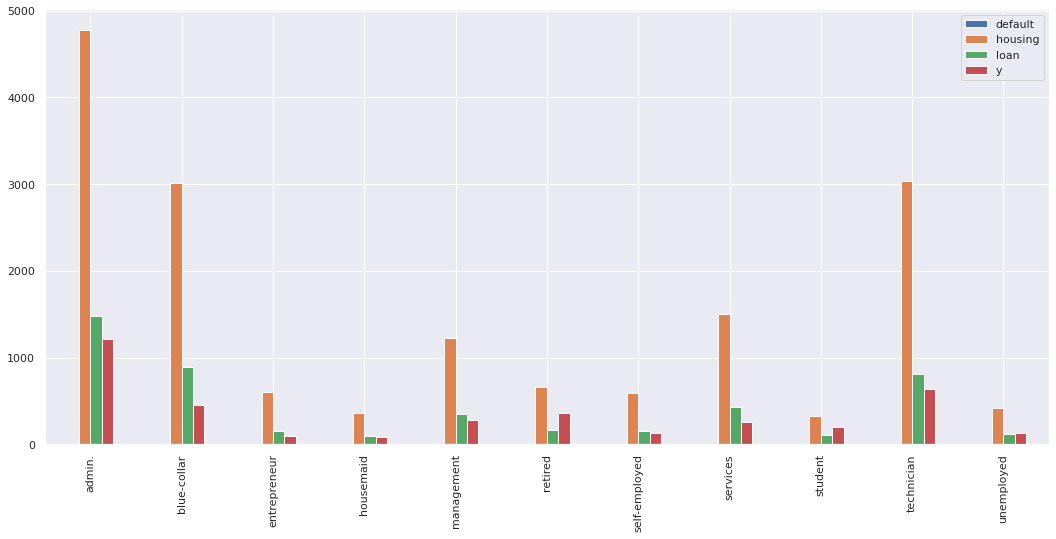

In [15]:
plt.rcParams['figure.figsize'] = (18,8)
ax = job_df.plot.bar()
ax.set_xticks(ticks = np.arange(11),labels = job_df['job'])
plt.show()

## 2. Thống kế số lượng các khoản nợ và tỷ lệ đăng ký theo tình trạng hôn nhân

In [16]:
marital_df = pd.DataFrame(columns = ['marital','default','housing', 'loan', 'y'])
group_marital_df = df.groupby('marital')
columns = ['default','housing', 'loan', 'y']

for name, subset_df in group_marital_df:
    row = pd.DataFrame(marital_df.columns)
    row['marital'] = name
    for column in columns:
        count = subset_df[subset_df[column] == 'yes']
        row[column] = count.shape[0]
    marital_df = pd.concat((marital_df,row))
    
marital_df = marital_df.iloc[:,:-1].drop_duplicates().reset_index().drop(columns = 'index')
marital_df

,marital,default,housing,loan,y
0,divorced,0,1909,538,410
1,married,3,9423,2746,2055
2,single,0,5184,1484,1393


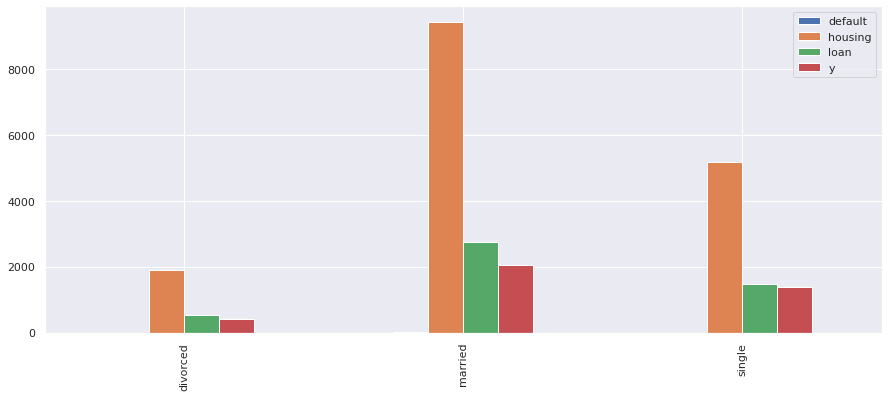

In [17]:
plt.rcParams['figure.figsize'] = (15,6)
ax = marital_df.plot.bar()
ax.set_xticks(ticks = np.arange(3),labels = marital_df['marital'])
plt.show()

## 3. Thống kế số lượng các khoản nợ và tỷ lệ đăng ký theo trình độ học vấn

In [18]:
education_df = pd.DataFrame(columns = ['education','default','housing', 'loan', 'y'])
group_education_df = df.groupby('education')
columns = ['default','housing', 'loan', 'y']

for name, subset_df in group_education_df:
    row = pd.DataFrame(education_df.columns)
    row['education'] = name
    for column in columns:
        count = subset_df[subset_df[column] == 'yes']
        row[column] = count.shape[0]
    education_df = pd.concat((education_df,row))
    
education_df = education_df.iloc[:,:-1].drop_duplicates().reset_index().drop(columns = 'index')
education_df

,education,default,housing,loan,y
0,basic.4y,0,1228,355,326
1,basic.6y,0,738,210,136
2,basic.9y,0,2330,659,380
3,high.school,1,4074,1200,934
4,illiterate,0,6,0,3
5,professional.course,2,2407,665,538
6,university.degree,0,5733,1679,1541


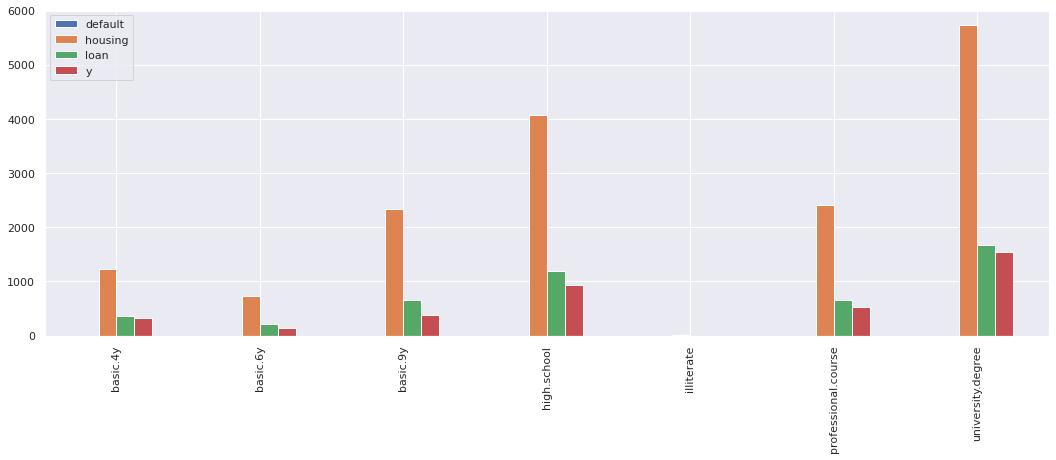

In [19]:
plt.rcParams['figure.figsize'] = (18,6)
ax = education_df.plot.bar()
ax.set_xticks(ticks = np.arange(7),labels = education_df['education'])
plt.show()